# Physics-Informed Machine Learning
Timon Palm

## 1D Linear Pertubated Wave Equation

$$ \frac{\partial^2{u}}{\partial{t^2}} = \frac{\partial^2{u}}{\partial{x^2}} -3u, \quad x \in [0, \pi], \quad t \in [0,1]$$

with inital and boundary conditions:

$$u(x,0) = 0, \quad \frac{\partial{u}}{\partial{t}}\biggr|_{t=0} = 2 \cos(x), \quad u(0,t) = \sin(2t), \quad u(\pi, t) = -\sin(2t)$$

and exact solution:

$$u_{exact}(x,t) = \cos(x)\sin(2t)$$

In [5]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import torch

In [6]:
def exact_solution(x, t):
    return np.cos(x) * np.sin(2*t)

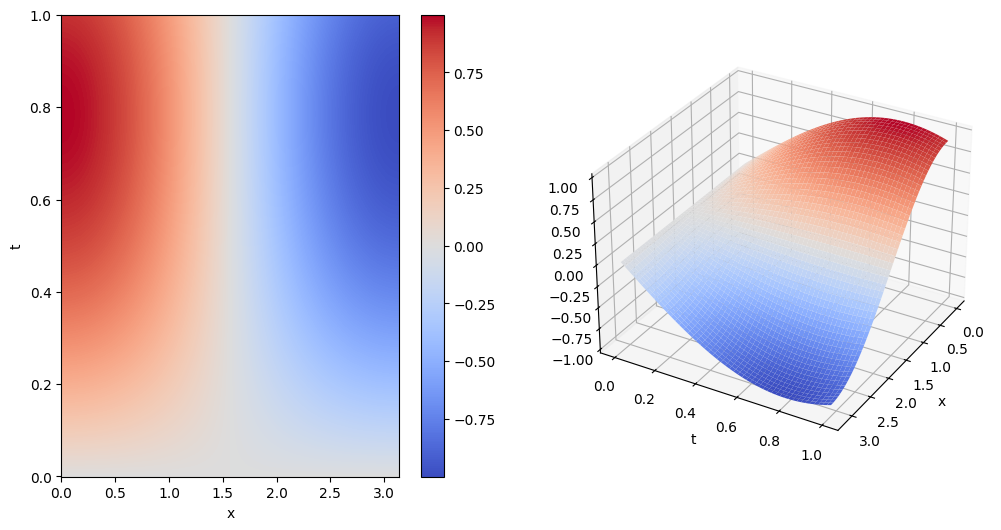

In [9]:
x = np.linspace(0, np.pi, 1000)
t = np.linspace(0, 1, 1000)

X, T = np.meshgrid(x, t)

U = exact_solution(X, T)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
plt.xlabel('x')
plt.ylabel('t')
c = ax.pcolormesh(X, T, U, cmap='coolwarm')
fig.colorbar(c, ax=ax)

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, T, U, cmap='coolwarm')
ax.view_init(30, 30)

plt.xlabel('x')
plt.ylabel('t')

plt.show()



## Part A: Theory

### Explain how physics-informed neural networks (PINNs) can be used to solve the above PDE.

**What is the role of the neural network in this approach?**

We have the unknown solution $u(x,t)$, which is potentially a very complex function. In PINN, we utilize the efficacy of neural networks to approximate functions and use neural networks  as a surrogate for the unknown function $u(x,t) \approx NN(x,t;\Theta)$. Thus, the neural network is a function of $u$, $t$ and its adjustible weights $\Theta$. PDEs can involve partial derivatives or in this case second partial derivatives $\frac{\partial^2{u}}{\partial{t^2}}$ and $\frac{\partial^2{u}}{\partial{x^2}}$, which can be easily obtained by exploiding auto-differentiation as $u$ is the neural network.

**How are the PDE, inital conditions and boundary conditions incorporated into the loss functions?**

Typically, the loss of a PINN $\mathcal{L} = \mathcal{L}_p + \mathcal{L}_b$ consists of residual and boundary term. 

**Residual**: In the residual, the actual PDE or ODE is incorporated into the neural network to impose the model to adhere to the differential equation. For that, the PDE is formulated as:

$$0 = \frac{\partial^2{u}}{\partial{x^2}} -3u -\frac{\partial^2{u}}{\partial{t^2}}, \quad x \in [0, \pi], \quad t \in [0,1]$$

This should be minimized. Typically, deviations get penalized by the Mean Squared Error. This leads to the residual term:

$$\mathcal{L}_p = \| \frac{\partial^2{u}}{\partial{x^2}} -3u -\frac{\partial^2{u}}{\partial{t^2}} \|^2$$

**Boundary**: The boundary term of the PINN-loss ensures that the all boundary conditions are satisfied. In this case, there are two boundary conditions $u(0,t) = \sin(2t)$ and $u(\pi, t) = -\sin(2t)$. The model should output thses values for $x=0$ and $x=\pi$, respectively. Similar to the residual term, we use the Mean Squared error to keep the output $NN(x,t;\Theta)$ for $x=0$ and $x=\pi$ close to the desired values. This results in the loss function:

$$\mathcal{L}_b = \|NN(0,t;\Theta) - \sin(2t)\|^2 + \|NN(\pi,t;\Theta) + \sin(2t)\|^2$$

In [ ]:
def nn_loss():
    residual = np.sum((ddx - 3 * u - ddt)**2)
    boundary = np.sum((u - np.sin(2 * t))**2) + np.sum((u + np.sin(2 * t))**2)

    return residual + boundary

**Why are collocation points important in PINNs?**

<font color='red'>
    - collocation points discretize the function, it allows to have training trajectories \\
    - without collocation points we were only able to fit the inital and terminal condition \\
    - sampling is important
</font> 

### Discuss the advantages of using PINNs over traditional numerical methods (e.g. finite difference or finite element methods) and pure data-driven approaches (e.g., standard neural networks) for solving PDEs. Also, mention potential challenges of using PINNs.



Advantages:

<font color='red'>
        - mash-free \\
        - can jointly solve forward and inverse problems\\
        - often performs well on "messy" problems \\
        - tractable \\
        - mostly unsupervised
</font> 

Challenges;

<font color='red'>
    - high computational cost \\
    - can be challenging to optimize \\
    - difficault to scale to larger domains, multi-scale, multi-physics problems\\
    - difficult for high dimensional problems
</font>

## Part B: Implementation

1. **Design a neural network architecture suitable for solving this problem. Justify your choices (e.g. number of layers, input layer, output layer, number of neurons per layer, activation functions).**

2. **Write the total loss function for this problem.**

3. **Outline the training loop for the PINN.**

# Part C: Validation and Error Analysis

1. **Suppose you have trained the PINN and obtain a solution $u_{PINN}(x,t)$. Validate the solution by comparing it with the exact solution $u_{exact}(x,t)$.**

2. **If the PDE residual $\biggr| \frac{\partial^2 u}{\partial t^2} - \frac{\partial^2 u}{\partial x^2} + 3u \biggr|$ is large at certain points in the domain, what could be the reason? Suggest two strategies to improve the solution.**